In [179]:
from scipy.fft import fft, ifft
from numpy.fft import ifftshift, fftshift, fftfreq, fft2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl

sns.set_theme()
# Set dpi
mpl.rcParams['figure.dpi'] = 100

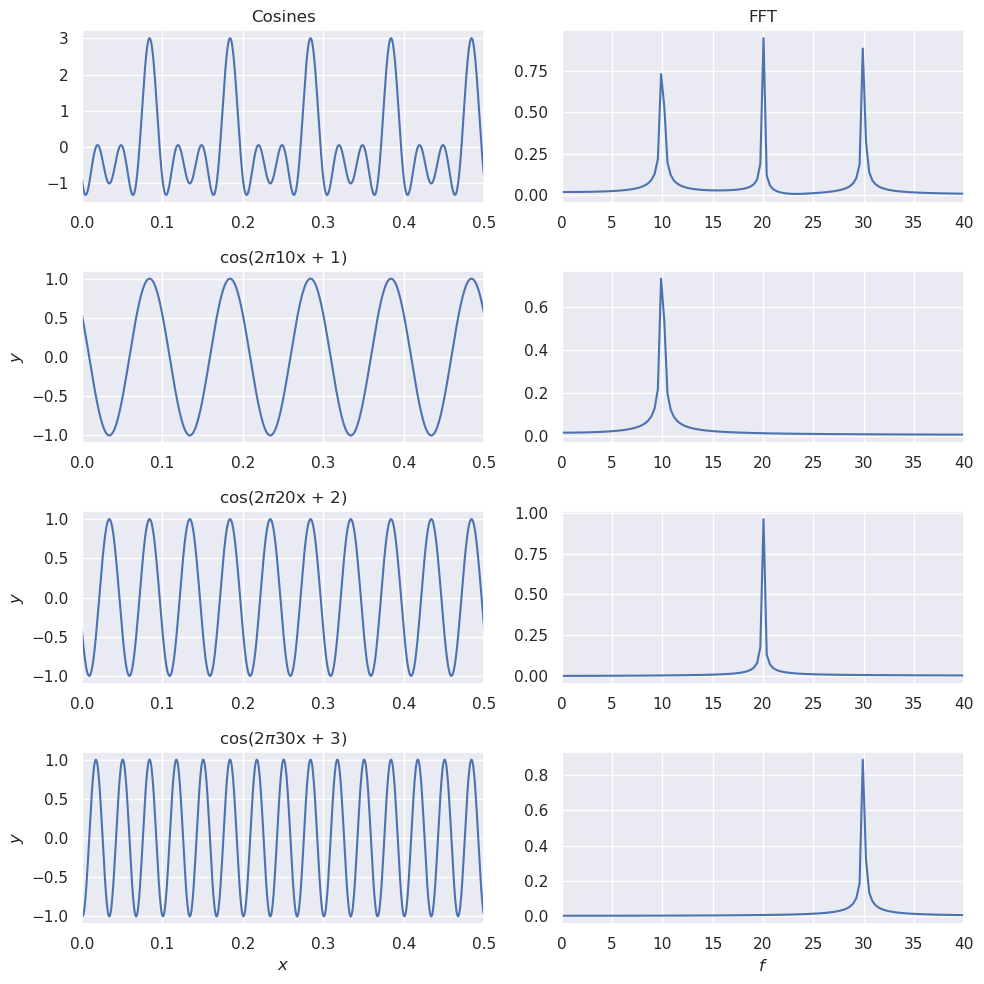

In [180]:
x = np.linspace(0, np.pi, 5000)

cosines = [np.cos(10*x*2*np.pi+1), np.cos(20*x*2*np.pi+2), np.cos(30*x*2*np.pi+3)]
total = np.sum(cosines, axis=0)

fig, ax = plt.subplots(4, 2, figsize=(10, 10))

ax[0][0].plot(x, total)
ax[0][0].set_xlim(0, 0.5)
for i, cosine in enumerate(cosines):
    ax[i+1][0].plot(x, cosine)
    ax[i+1][0].set_title(f"cos($2\\pi${(i+1)*10}x + {i+1})")
    ax[i+1][0].set_ylabel("$y$")
    ax[i+1][0].set_xlim(0, 0.5)

ax[3][0].set_xlabel("$x$")
ax[0][0].set_title("Cosines")
plt.tight_layout()

# FFT
N = len(x)
T = x[1] - x[0]

yf_total = fft(total)
xf_total = fftfreq(N, T)[:N//2]

yf_cosines = [fft(cosine) for cosine in cosines]
xf_cosines = [fftfreq(N, T)[:N//2] for _ in cosines]

ax[0][1].plot(xf_total, 2.0/N * np.abs(yf_total[:N//2]))
ax[0][1].set_xlim(0, 40)
for i, yf_cosine in enumerate(yf_cosines):
    ax[i+1][1].plot(xf_cosines[i], 2.0/N * np.abs(yf_cosine[0:N//2]))
    ax[i+1][1].set_xlim(0, 40)

ax[3][1].set_xlabel("$f$")
ax[0][1].set_title("FFT")
plt.tight_layout()

plt.show()

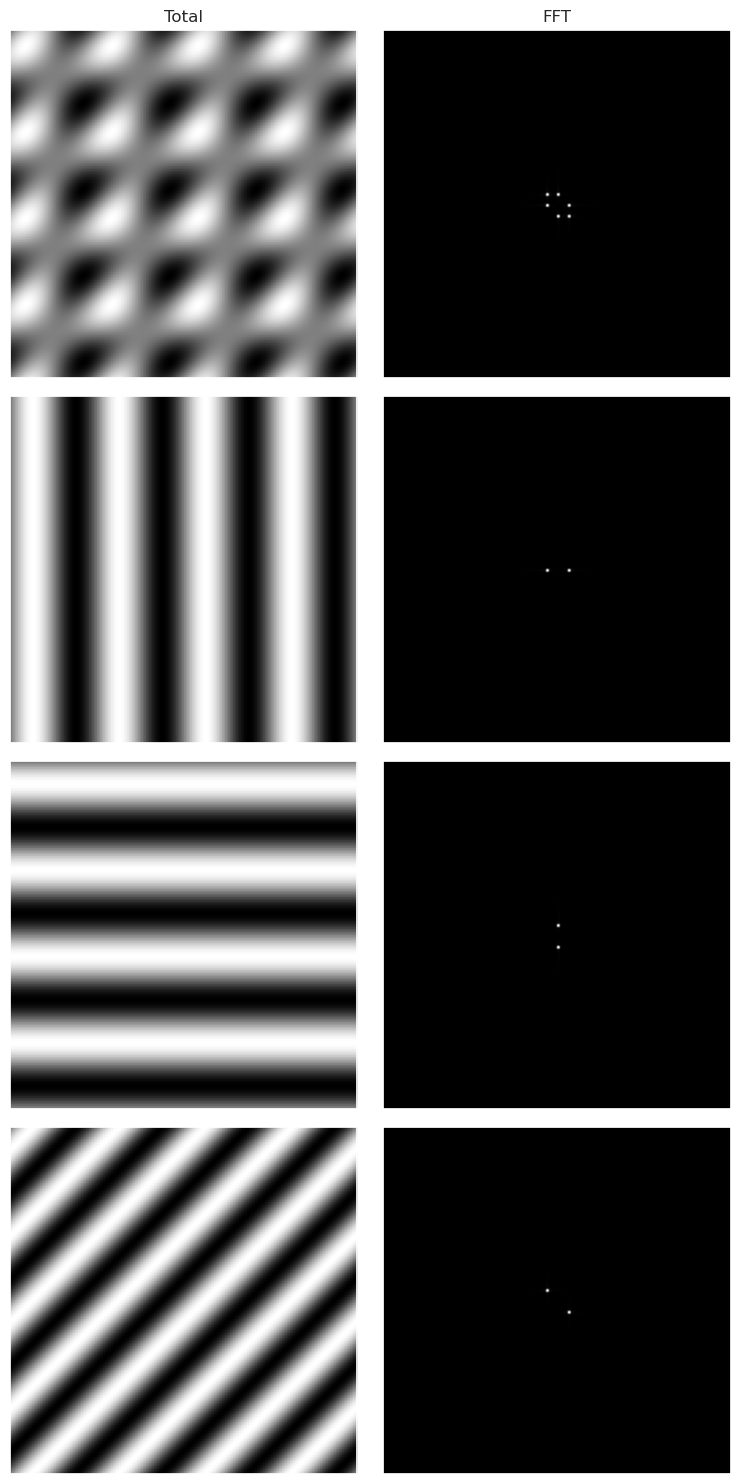

In [185]:
N = 128

f, ax = plt.subplots(4, 2, figsize=(8, 15), tight_layout=True, sharex=True, sharey=True)

xs = np.linspace(-4*np.pi, 4*np.pi, N)
ys = np.linspace(-4*np.pi, 4*np.pi, N)
tau, phi = np.meshgrid(xs, ys)

sines = [np.sin(tau), np.sin(phi), np.sin(tau + phi)]
total = np.sum(sines, axis=0)

ax[0][0].imshow(total, cmap="gray")
ax[0][0].set_title("Total")
ax[0][0].grid(False)

for i, sine in enumerate(sines):
    ax[i+1][0].imshow(sine, cmap="gray")
    ax[i+1][0].set_yticks([])
    ax[i+1][0].grid(False)

# Remove thicks
ax[3][0].set_xticks([], [])

# FFT
# Take the 2-dimensional DFT and centre the frequencies
ftimage = np.fft.fft2(total)
ftimage = np.fft.fftshift(ftimage)
ax[0][1].imshow(np.abs(ftimage), cmap="gray")
ax[0][1].set_title("FFT")
ax[0][1].grid(False)

for i, sine in enumerate(sines):
    ftimage = np.fft.fft2(sine)
    ftimage = np.fft.fftshift(ftimage)
    ax[i+1][1].imshow(np.abs(ftimage), cmap="gray")
    ax[i+1][1].grid(False)

plt.show()



In [186]:
from matplotlib.image import imread

# Load image
img = imread("example.jpg")

# Convert to grayscale
img = np.mean(img, axis=2)

# Crop to square
img = img[:img.shape[1]//2, :img.shape[1]//2]

# Resize
img = np.array(Image.fromarray(img).resize((128, 128)))/255


/tmp/ipykernel_623/769047245.py:73: RuntimeWarning: overflow encountered in exp
  ax[2][1].imshow(np.exp(np.abs(ftimage)), cmap="gray")


[]

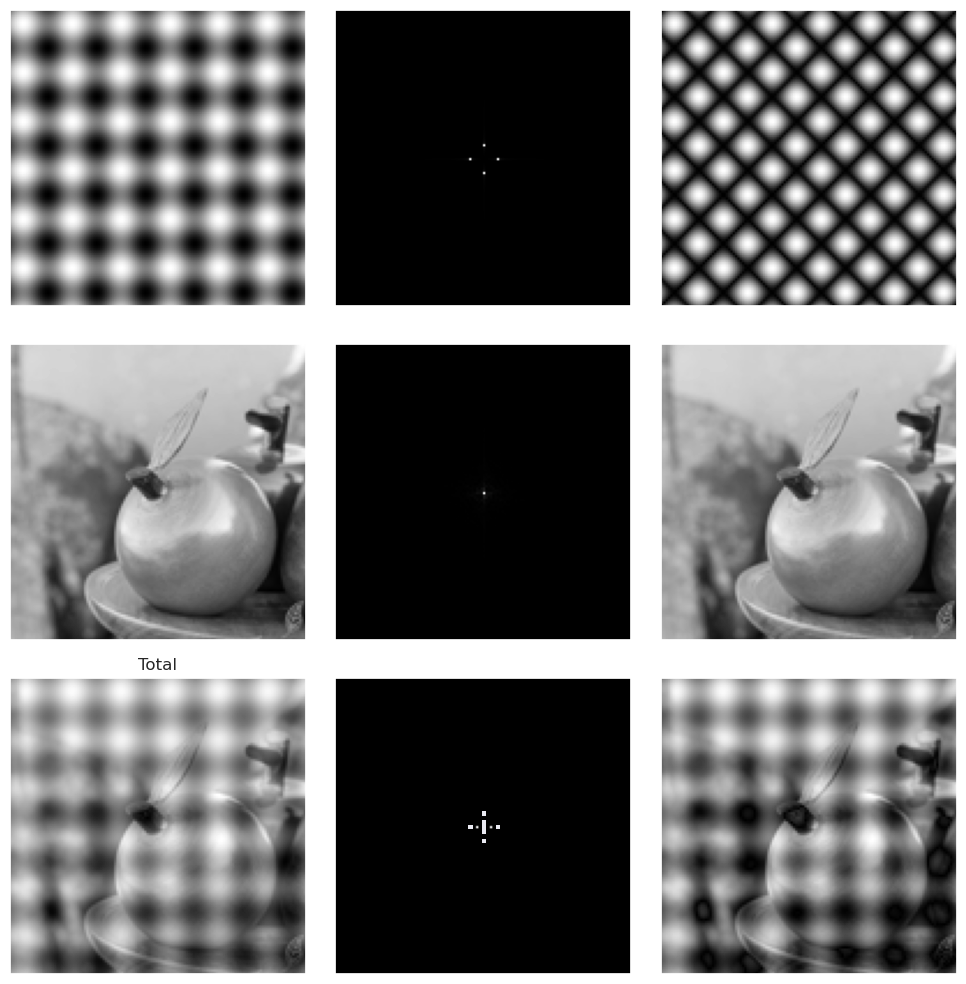

In [190]:
# Create 2D sine wave
N = 128

x = np.linspace(-6*np.pi, 6*np.pi, N)
xsine = np.sin(x)
tau, phi= np.meshgrid(xsine, xsine)

fig, ax = plt.subplots(3, 3, figsize=(10, 10), tight_layout=True)

ax[0][0].imshow(tau + phi, cmap="gray")
ax[0][0].grid(False)
# remove ticks
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])

# FFT
# Take the 2-dimensional DFT and centre the frequencies
ftimage = np.fft.fft2(tau + phi)
ftimage = np.fft.fftshift(ftimage)
ax[0][1].imshow(np.abs(ftimage), cmap="gray")
ax[0][1].grid(False)
ax[0][1].set_xticks([])
ax[0][1].set_yticks([])

# Inverse FFT
# Take the 2-dimensional inverse DFT and centre the frequencies
iftimage = np.fft.ifft2(np.fft.fft2(tau + phi))
#iftimage = np.fft.fftshift(iftimage)
ax[0][2].imshow(np.abs(iftimage), cmap="gray")
ax[0][2].grid(False)
# remove ticks
ax[0][2].set_xticks([])
ax[0][2].set_yticks([])

# With image
ax[1][0].imshow(img, cmap="gray")
ax[1][0].grid(False)
# remove ticks
ax[1][0].set_xticks([])
ax[1][0].set_yticks([])

# FFT
# Take the 2-dimensional DFT and centre the frequencies
ftimage = np.fft.fft2(img)
ftimage = np.fft.fftshift(ftimage)
ax[1][1].imshow(np.abs(ftimage), cmap="gray")
ax[1][1].grid(False)
ax[1][1].set_xticks([])
ax[1][1].set_yticks([])

# Inverse FFT
# Take the 2-dimensional inverse DFT and centre the frequencies
iftimage = np.fft.ifft2(np.fft.fft2(img))
#iftimage = np.fft.fftshift(iftimage)
ax[1][2].imshow(np.abs(iftimage), cmap="gray")
ax[1][2].grid(False)
# remove ticks
ax[1][2].set_xticks([])
ax[1][2].set_yticks([])

# Both
ax[2][0].imshow((tau + phi)*0.2 + img, cmap="gray")
ax[2][0].grid(False)
# remove ticks
ax[2][0].set_xticks([])
ax[2][0].set_yticks([])
ax[2][0].set_title("Total")

# FFT
# Take the 2-dimensional DFT and centre the frequencies
ftimage = np.fft.fft2((tau + phi)*0.2 + img)
ftimage = np.fft.fftshift(ftimage)
ax[2][1].imshow(np.exp(np.abs(ftimage)), cmap="gray")
ax[2][1].grid(False)
ax[2][1].set_xticks([])
ax[2][1].set_yticks([])

# Inverse FFT
# Take the 2-dimensional inverse DFT and centre the frequencies
iftimage = np.fft.ifft2(np.fft.fft2((tau + phi)*0.2 + img))
#iftimage = np.fft.fftshift(iftimage)
ax[2][2].imshow(np.abs(iftimage),   cmap="gray")
ax[2][2].grid(False)
# remove ticks
ax[2][2].set_xticks([])
ax[2][2].set_yticks([])
